In [875]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from dataclasses import dataclass

In [876]:
seed = 228

In [877]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)
df.drop(columns=['ID'], inplace=True)
df.reset_index(drop=True)
df.sample(5)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
324,55.000000,female,33.535000,2,no,northwest,Engaged,Healthcare Support,Moderately Active,6.0,Fair,56003.090000,12269.688650
2697,29.000000,male,22.895000,0,yes,northeast,Married,Finance,Lightly Active,4.6,Good,48632.540000,16138.762050
1663,21.000000,male,35.530000,0,no,southeast,Engaged,Construction,Lightly Active,7.2,Poor,11888.770000,1532.469700
69,21.000000,male,25.745000,2,no,northeast,Single,Retail,Lightly Active,4.3,Poor,19729.860000,3279.868550
2806,38.207465,male,27.083286,2,no,southwest,Single,Hospitality,Sedentary,7.7,Poor,158650.890193,4641.509159


In [878]:
df.describe()

,age,bmi,children,stress_level,income (USD),charges (USD)
count,3090.000000,3059.000000,3090.000000,3090.000000,3090.000000,3067.000000
mean,39.090493,32.164780,1.119094,6.413689,62418.074529,13488.414417
std,14.139518,99.455521,1.208068,1.722001,64708.943854,12091.943251
min,-8.000000,-989.915959,-3.000000,0.000000,-126055.018185,1000.000000
25%,27.000000,26.315000,0.000000,5.200000,20236.880000,4719.524050
50%,39.000000,30.495000,1.000000,6.400000,41783.988014,9644.252500
75%,51.000000,34.800000,2.000000,7.600000,83985.069923,17870.867613
max,88.336729,5424.864393,5.000000,10.000000,528054.020000,63770.428010


In [879]:
print(f'smoker: {df.smoker.unique()}')
print(f'gender: {df.gender.unique()}')
print(f'region: {df.region.unique()}')
print(f'status: {df.status.unique()}')
print(f'work sector: {df.work_sector.unique()}')
print(f'sleep quality: {df.sleep_quality.unique()}')
print(f'physical activity: {df.physical_activity.unique()}')

smoker: ['no' 'yes' '-' 'DFH']
gender: ['female' 'male']
region: ['southwest' 'northwest' 'southeast' 'northeast']
status: ['Single' 'Engaged' 'Married' 'Single-Parent' 'CDE' 'ABC' nan]
work sector: ['Education' 'IT Support' 'Transportation' 'Hospitality' 'Unemployed'
 'Healthcare Support' 'Retail' 'Entrepreneur' 'Finance' 'Construction'
 'Retail Management' 'Healthcare' 'Law' 'Management' 'Self-Employed' 'IT'
 nan 'Engineering' 'Wizardry' 'Interdimensional Trade']
sleep quality: ['Fair' 'Poor' 'Good' 'Excellent' 'CDE']
physical activity: ['Lightly Active' 'Sedentary' 'Very Active' 'Moderately Active' nan
 'video-gamer']


In [880]:
mask = (df['status'] == 'ABC') | (df['status'] == 'CDE') | (df['sleep_quality'] == 'CDE') | (
        df['physical_activity'] == 'video-gamer')
df[mask]
# drop those 3 as they make no sense and ~0.1% of dataset
# all of them have 2 'corrupted' features

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
36,32.027049,male,32.316381,-3,no,southeast,Married,Construction,Moderately Active,5.3,CDE,9390.753386,10412.900531
573,22.632769,male,-989.915959,0,no,northwest,CDE,Healthcare Support,Lightly Active,2.0,Excellent,98023.266602,22486.448061
639,44.676202,male,27.186491,0,yes,southeast,ABC,Wizardry,video-gamer,4.9,Good,85887.492717,14737.870783


also 'Wizardry' and 'Interdimensional Trade' are strange, I'll drop them to nan and use as Unknown

In [881]:
df.work_sector = df.work_sector.replace(['Wizardry', 'Interdimensional Trade'], np.nan)

In [882]:
df = df[~mask]
df.reset_index(drop=True)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
0,45.0,female,25.700,3,no,southwest,Single,Education,Lightly Active,6.9,Fair,44324.35,9101.79800
1,32.0,male,28.120,4,yes,northwest,Engaged,IT Support,Sedentary,6.9,Poor,102553.91,21472.47880
2,41.0,female,37.100,2,-,southwest,Single,Transportation,Very Active,5.9,Fair,18429.43,7371.77200
3,26.0,male,31.065,0,no,northwest,Single,Education,Sedentary,5.9,Fair,14888.09,2699.56835
4,23.0,female,34.960,3,no,northwest,Married,Hospitality,Sedentary,8.6,Good,15571.19,4466.62140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,54.0,male,34.210,2,yes,southeast,Married,Finance,Lightly Active,9.2,Poor,336130.93,44260.74990
3083,18.0,female,31.350,4,no,northeast,Single,Retail,Sedentary,10.0,Poor,21624.45,4561.18850
3084,39.0,female,23.870,5,no,southeast,Single,Transportation,Lightly Active,5.8,Good,36357.70,8582.30230
3085,58.0,male,25.175,0,no,northeast,Single,Education,Lightly Active,4.7,Poor,69475.40,11931.12525


let's encode features:
- gender to boolean 'is_male'
- smoker oneHot (smoking, not smoking, unknown)
- region oneHot
- status oneHot (later after imputation)
- work_sector oneHot (later after imputation)
- sleep_quality numerical (as it's ordinal Poor -> Excellent)
- physical_activity numerical (as it's ordinal Sedentary -> Very Active)

In [883]:
print(f'{(df.children < 0).sum()} negative children rows')
df[(df.age < 18)]

1 negative children rows


,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
87,15.123557,female,30.360872,0,no,southeast,Single,Retail,Lightly Active,6.3,Poor,87861.868595,12864.070934
229,15.727649,female,41.854735,3,no,southeast,Married,IT,Moderately Active,4.5,Poor,140960.706083,46680.037223
306,15.168302,female,33.939556,0,yes,southwest,Engaged,Retail Management,Moderately Active,6.7,Fair,111189.507135,2495.923471
450,6.190668,female,22.324037,1,no,southeast,Married,Hospitality,Sedentary,1.8,Excellent,865.951745,5679.525258
454,13.329776,male,31.931234,3,yes,northwest,Single,Healthcare,Sedentary,7.3,Poor,86474.198292,29890.117369
482,2.374126,female,26.686038,1,no,northwest,Single,Finance,Moderately Active,6.5,Fair,101398.371162,27999.218508
695,2.879041,female,28.338212,2,yes,southwest,Single,Finance,Lightly Active,9.1,Poor,148958.692649,37556.610697
789,15.834161,male,38.075766,1,no,northwest,Single,Healthcare,Lightly Active,8.1,Poor,7890.258501,17332.663693
871,12.526339,female,26.256683,2,no,northwest,Married,Management,Moderately Active,4.3,Fair,143381.792011,3256.099146
882,10.592705,male,31.844211,0,yes,northeast,Married,Hospitality,Lightly Active,6.2,Poor,20342.800913,23619.942885


only one with negative children, let's just set it to 0

those values of age make no sense (married or with children at <18...)

let's drop those with nan, and later impute them

In [884]:
df['smoker'] = df['smoker'].str.strip().str.lower()
df['smoking'] = df['smoker'].eq('yes').astype('float')
df['not_smoking'] = df['smoker'].eq('no').astype('float')
df = df.drop(columns=['smoker'])
df.children = df.children.apply(lambda x: max(x, 0)).astype(float)
df['is_male'] = df.gender.apply(lambda x: 1 if x == 'male' else 0).astype(float)
df.drop(columns=['gender'], inplace=True)
df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype=float)
df.sleep_quality = df.sleep_quality.apply(lambda x:
                                          {
                                              'Poor': 0,
                                              'Fair': 1,
                                              'Good': 2,
                                              'Excellent': 3
                                          }[x]).astype(float)
df.physical_activity = df.physical_activity.apply(lambda x:
                                                  {
                                                      'Sedentary': 0,
                                                      'Lightly Active': 1,
                                                      'Moderately Active': 2,
                                                      'Very Active': 3
                                                  }.get(x, np.nan)).astype(float)
df.age = df.age.where(df.age >= 18)
df.sample(10)

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest
323,58.000000,36.480000,0.0,Engaged,Education,2.0,5.0,1.0,80903.810000,12235.839200,0.0,1.0,0.0,1.0,0.0,0.0
609,57.000000,23.180000,0.0,Single,Education,1.0,6.3,1.0,56442.950000,11830.607200,0.0,1.0,0.0,1.0,0.0,0.0
799,55.000000,26.980000,0.0,Single,Transportation,2.0,5.8,1.0,48853.220000,11082.577200,0.0,1.0,0.0,1.0,0.0,0.0
1928,60.000000,35.100000,0.0,Single,Retail,1.0,5.8,0.0,39626.550000,12644.589000,0.0,1.0,0.0,0.0,0.0,1.0
704,34.853552,32.071349,1.0,Married,Construction,1.0,8.9,0.0,67739.637504,12996.396529,1.0,0.0,1.0,1.0,0.0,0.0
1706,34.000000,26.410000,1.0,Married,Education,1.0,7.2,0.0,51745.300000,5385.337900,0.0,1.0,0.0,1.0,0.0,0.0
766,35.000000,24.130000,1.0,Engaged,Healthcare Support,2.0,3.8,3.0,19903.380000,5125.215700,0.0,1.0,1.0,1.0,0.0,0.0
2699,55.000000,21.500000,1.0,Single,Transportation,1.0,4.6,0.0,41152.570000,10791.960000,0.0,1.0,1.0,0.0,0.0,1.0
2474,36.000000,33.820000,1.0,Single,Healthcare Support,1.0,5.9,2.0,13443.640000,5377.457800,0.0,0.0,1.0,1.0,0.0,0.0
587,64.000000,36.960000,2.0,Married,Healthcare,2.0,6.8,1.0,270483.520000,49577.662400,1.0,0.0,1.0,0.0,1.0,0.0


In [885]:
row_misses = df.isna().mean(axis=1) * 100
(row_misses > 30).sum()  # all rows good

0

now let's check outliers

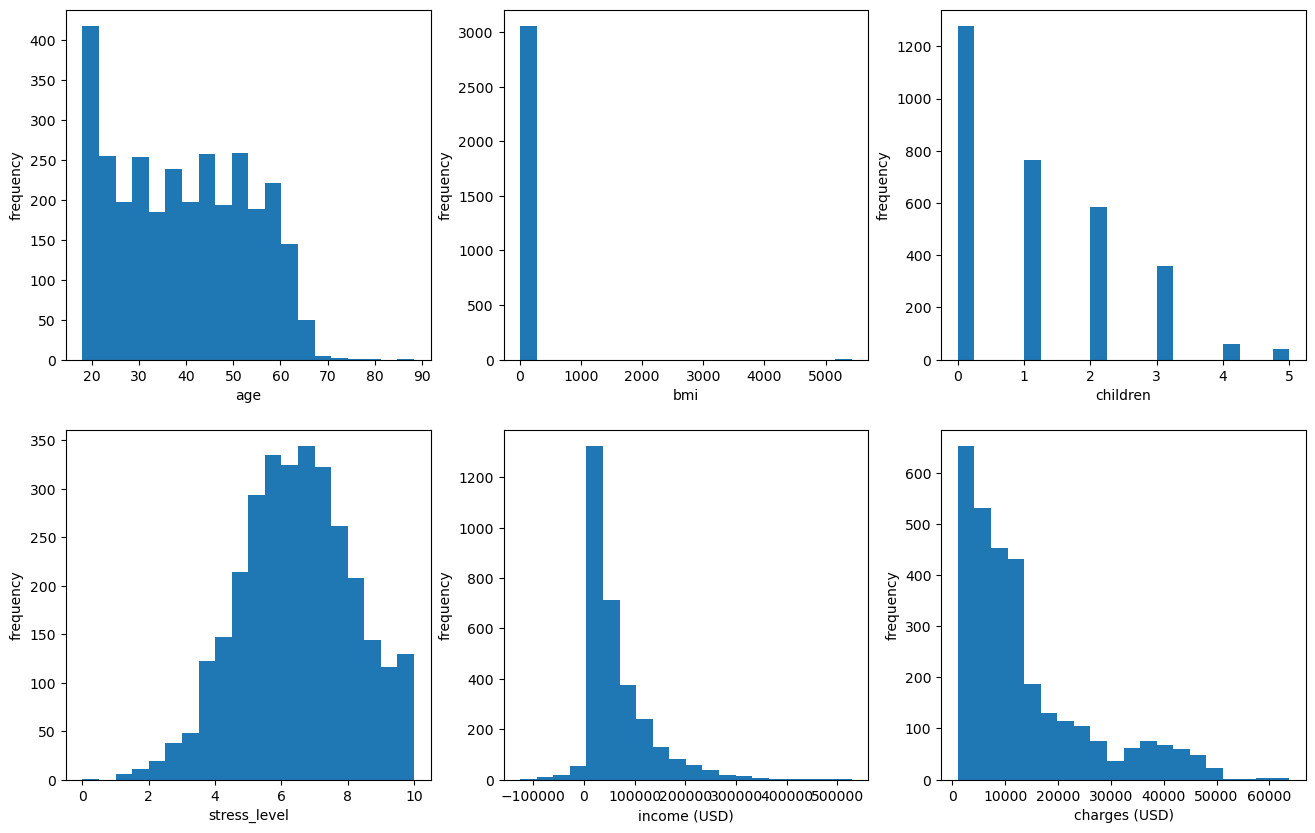

In [886]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

- bmi clearly have outliers
- income is super skewed, let's drop negative vals (for later imputation) and do log transform
- charges skewed too, same log there
- age is uniform, so let's bin it
- also we have negative income... I'll make a flag for those values (negative_income_flag), this flag would allow us to treat those values better OR it'll be reduced on feature selection phase

In [887]:
(df['income (USD)'] <= 0).sum()

54

In [888]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df.bmi = df.bmi.mask((df.bmi < lower) | (df.bmi > upper))

mask = (df['income (USD)'] < 0)
df['negative_income_flag'] = mask.astype(float)

df['income (USD)'] = df['income (USD)'].mask(mask)
df['income (USD)'] = np.log1p(df['income (USD)'].apply(lambda x: max(x, 0)))
df['charges (USD)'] = np.log1p(df['charges (USD)'].apply(lambda x: max(x, 0)))

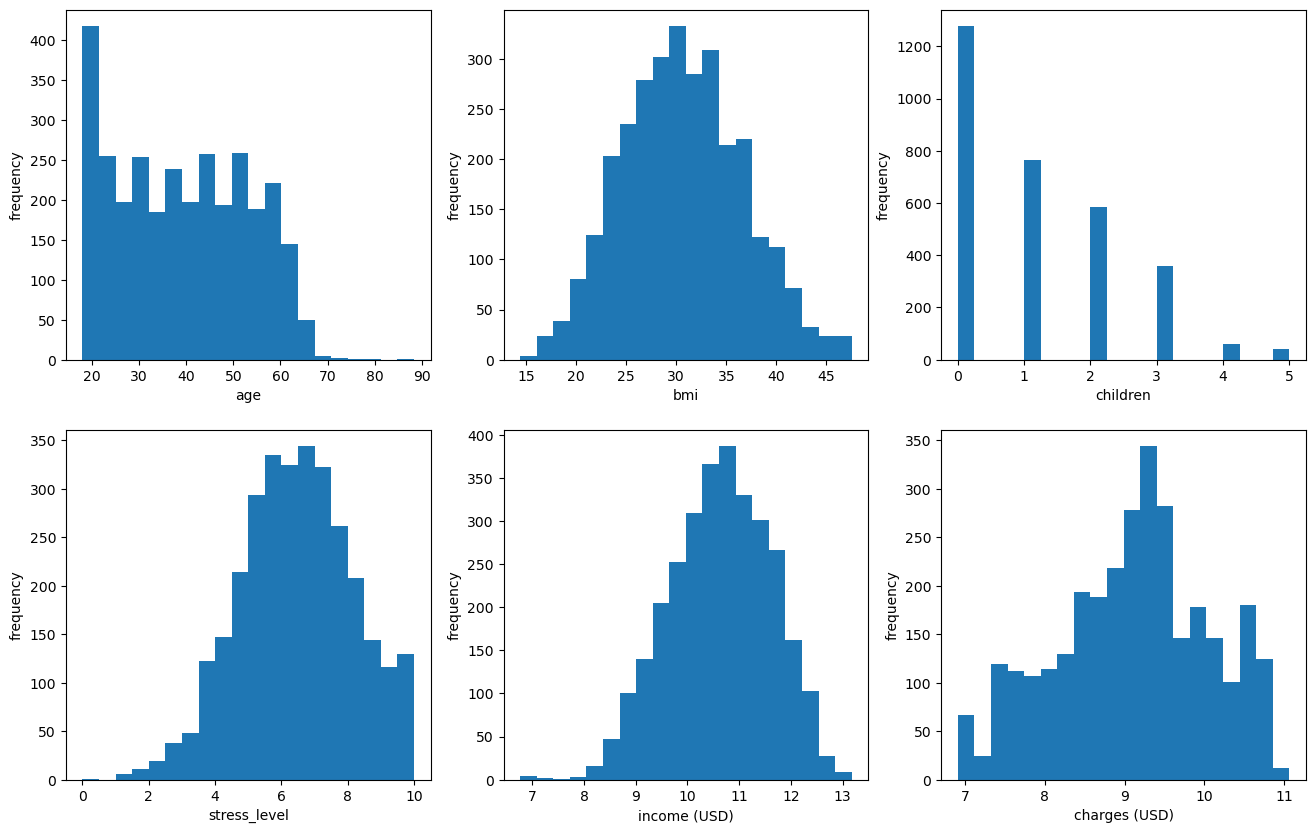

In [889]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

binning:

let's bin to <25, 25-35, 35-45 ... >65

In [890]:
cut = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65+']
df.age = pd.cut(df.age, bins=cut, labels=labels)
df

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest,negative_income_flag
0,35-45,25.700,3.0,Single,Education,1.0,6.9,1.0,10.699312,9.116337,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,25-35,28.120,4.0,Engaged,IT Support,0.0,6.9,0.0,11.538154,9.974574,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,35-45,37.100,2.0,Single,Transportation,3.0,5.9,1.0,9.821758,8.905549,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25-35,31.065,0.0,Single,Education,0.0,5.9,1.0,9.608384,7.901218,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,15-25,34.960,3.0,Married,Hospitality,0.0,8.6,2.0,9.653242,8.404611,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,45-55,34.210,2.0,Married,Finance,1.0,9.2,0.0,12.725259,10.697876,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3094,15-25,31.350,4.0,Single,Retail,0.0,10.0,0.0,9.981626,8.425558,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3095,35-45,23.870,5.0,Single,Transportation,1.0,5.8,2.0,10.501189,9.057574,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3096,55-65,25.175,0.0,Single,Education,1.0,4.7,0.0,11.148742,9.386990,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Imputation time

In [891]:
df.isna().sum()

age                     23
bmi                     48
children                 0
status                   1
work_sector             39
physical_activity       78
stress_level             0
sleep_quality            0
income (USD)            54
charges (USD)           23
smoking                  0
not_smoking              0
is_male                  0
region_northwest         0
region_southeast         0
region_southwest         0
negative_income_flag     0
dtype: int64

let's drop all rows for charges (as it's target feature)

In [892]:
df = df[~df['charges (USD)'].isna()]

work sector: is something not imputable (as it's a job I will make Missing values 'Unknown')

In [893]:
df.loc[:, 'work_sector'] = df['work_sector'].fillna('Unknown')

age: we are missing only 23 vals, so let's fill with mode

In [894]:
df.loc[:, 'age'] = df['age'].fillna(df['age'].mode()[0])

physical activity: we are missing only 79 vals, fill with mode

In [895]:
df.loc[:, 'physical_activity'] = df['physical_activity'].fillna(df['physical_activity'].median())

status: same

In [896]:
df.loc[:, 'status'] = df['status'].fillna(df['status'].mode()[0])

now we can do imputation:
- split
- scale
- kNN impute

In [897]:
y = df.pop('charges (USD)')
X = df

In [898]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=seed, shuffle=True
)

Now we gonna scale + impute

In [899]:
cols = ['bmi', 'stress_level', 'income (USD)']
standard_scaler = sk.preprocessing.StandardScaler()
X_train[cols] = standard_scaler.fit_transform(X_train[cols])
X_test[cols] = standard_scaler.transform(X_test[cols])

for kNN imputation I'll use Jensen–Shannon divergence formula, to keep distribution alike

In [900]:
def jsd(x, y, bins=30, eps=1e-12):
    hx, e = np.histogram(np.asarray(x, float)[~np.isnan(x)], bins=bins, density=True)
    hy, _ = np.histogram(np.asarray(y, float)[~np.isnan(y)], bins=e, density=True)
    hx = (hx + eps)
    hy = (hy + eps)
    hx /= hx.sum()
    hy /= hy.sum()
    m = 0.5 * (hx + hy)
    js = 0.5 * np.sum(hx * (np.log(hx) - np.log(m))) + 0.5 * np.sum(hy * (np.log(hy) - np.log(m)))
    return float(js / (np.log2(len(hx)) if len(hx) > 1 else 1.0))

In [901]:
def try_knn(n):
    X_train_copy = X_train.copy()
    kNN_imputer = sk.impute.KNNImputer(n_neighbors=n)
    X_train_copy[cols] = kNN_imputer.fit_transform(X_train_copy[cols])
    avg_loss = 0
    for col in cols:
        avg_loss += jsd(X_train[col], X_train_copy[col])
    avg_loss /= len(cols)
    return avg_loss

In [902]:
best_n = -1
best_loss = float('inf')
for n in range(1, 101):
    avg_loss = try_knn(n)
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_n = n
print(f'Best N: {best_n} with loss: {best_loss}')

Best N: 2 with loss: 3.4751238937447335e-06


In [903]:
kNN_imputer = sk.impute.KNNImputer(n_neighbors=best_n)
X_train[cols] = kNN_imputer.fit_transform(X_train[cols])
X_test[cols] = kNN_imputer.transform(X_test[cols])

In [904]:
cat_cols = ['status', 'work_sector', 'age']

encoder = sk.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False)

Xtr_cat = encoder.fit_transform(X_train[cat_cols])
Xte_cat = encoder.transform(X_test[cat_cols])

cat_names = encoder.get_feature_names_out(cat_cols)
Xtr_cat = pd.DataFrame(Xtr_cat, index=X_train.index, columns=cat_names)
Xte_cat = pd.DataFrame(Xte_cat, index=X_test.index, columns=cat_names)

num_cols = [c for c in X_train.columns if c not in cat_cols]
X_train = pd.concat([X_train[num_cols].reset_index(drop=True), Xtr_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test[num_cols].reset_index(drop=True), Xte_cat.reset_index(drop=True)], axis=1)

In [905]:
X_train.isna().sum()

bmi                               0
children                          0
physical_activity                 0
stress_level                      0
sleep_quality                     0
income (USD)                      0
smoking                           0
not_smoking                       0
is_male                           0
region_northwest                  0
region_southeast                  0
region_southwest                  0
negative_income_flag              0
status_Engaged                    0
status_Married                    0
status_Single                     0
status_Single-Parent              0
work_sector_Construction          0
work_sector_Education             0
work_sector_Engineering           0
work_sector_Entrepreneur          0
work_sector_Finance               0
work_sector_Healthcare            0
work_sector_Healthcare Support    0
work_sector_Hospitality           0
work_sector_IT                    0
work_sector_IT Support            0
work_sector_Law             

### Feature selection

I'll do 3 shown methods, retrieve their masks and sum them to get finale feature subset

In [906]:
select1 = sk.feature_selection.SelectKBest(k=30)
select1.fit(X_train, y_train)
mask1 = select1.get_support()
mask1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True,  True])

In [907]:
select2 = sk.feature_selection.SelectFromModel(sk.ensemble.RandomForestRegressor(n_estimators=100, random_state=seed),
                                               threshold="median")
select2.fit(X_train, y_train)
mask2 = select2.get_support()
mask2

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False])

In [908]:
select3 = sk.feature_selection.RFE(sk.ensemble.RandomForestRegressor(n_estimators=100, random_state=seed),
                                   n_features_to_select=30)
select3.fit(X_train, y_train)
mask3 = select3.get_support()
mask3

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True, False])

In [909]:
final_mask = mask1.astype(int) + mask2.astype(int) + mask3.astype(int)

now let's drop those with score less then 2

In [910]:
final_mask = final_mask > 1
final_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False])

so we are going to drop those columns:

In [911]:
X_train.columns[~final_mask]

Index(['region_southwest', 'status_Engaged', 'work_sector_Education',
       'work_sector_Engineering', 'work_sector_Entrepreneur',
       'work_sector_Healthcare Support', 'work_sector_IT Support',
       'work_sector_Law', 'work_sector_Retail Management',
       'work_sector_Self-Employed', 'work_sector_Transportation',
       'work_sector_Unemployed', 'work_sector_Unknown', 'age_65+'],
      dtype='object')

In [912]:
X_train_reduced = X_train.loc[:, final_mask]
X_test_reduced = X_test.loc[:, final_mask]

In [913]:
print(f'{X_train.shape[1]} features reduced to {X_test_reduced.shape[1]} features')

41 features reduced to 27 features


# Linear Regression

3.a) Let's test sklearn implementation of Linear regression

In [914]:
model = sk.linear_model.LinearRegression()
model.fit(X_train_reduced, y_train)

y_pred_train = model.predict(X_train_reduced)
y_pred_test = model.predict(X_test_reduced)

print("intercept_:", model.intercept_)
print("coef_:", model.coef_)
print("RMSE (train):", sk.metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE (test):", sk.metrics.mean_squared_error(y_test, y_pred_test))
print("R^2 (train):", sk.metrics.r2_score(y_train, y_pred_train))
print("R^2 (test):", sk.metrics.r2_score(y_test, y_pred_test))

intercept_: 9.35747011054605
coef_: [ 0.01583251  0.02541454 -0.01540978  0.01710563 -0.01258678  0.43420941
  0.40826475  0.01110663 -0.04999526  0.0136728  -0.03921663 -0.05278697
  0.25424566 -0.04518687  0.32084311 -0.10920952  0.36873902  0.31000287
 -0.0777683   0.49744641  0.29217145 -0.08508279 -0.73491107 -0.54940132
 -0.3531797  -0.19049909 -0.10520089]
RMSE (train): 0.20067754899126025
RMSE (test): 0.24233265779247865
R^2 (train): 0.7757985469385635
R^2 (test): 0.7394969514821345


Now, let's do linear regression by our own

In [915]:
from dataclasses import dataclass
import numpy as np
import sklearn as sk

@dataclass
class EpochLog:
    epoch: int
    train_losses: tuple[float, float, float, float]  # MSE, RMSE, MAE, R2
    test_losses:  tuple[float, float, float, float]  # MSE, RMSE, MAE, R2
    theta: list[float]

def _assert_no_nan(name, arr):
    A = np.asarray(arr)
    if not np.isfinite(A).all():
        raise ValueError(f"{name} contains NaN/Inf. Check preprocessing.")

def _soft_threshold(v: np.ndarray, thresh: float) -> np.ndarray:
    # elementwise soft-thresholding
    return np.sign(v) * np.maximum(np.abs(v) - thresh, 0.0)

def linear_regression(
    eta, n_epochs, data, test, y_train, y_test,
    batch_size=None, seed=42, divergence_guard=1e12,
    lasso: bool=False, ridge: bool=False, alpha: float=1e-3
):
    """
    Mini-batch / batch GD for linear regression with optional regularization.

    Loss (per sample):
      MSE:      (1/n) ||X w - y||^2
      Ridge:    (1/n) ||X w - y||^2 + alpha * ||w_no_bias||_2^2
      Lasso:    (1/n) ||X w - y||^2 + alpha * ||w_no_bias||_1

    Notes:
      - Set *either* lasso=True *or* ridge=True (not both).
      - alpha should be tuned on validation.
      - Bias term (w[0]) is NOT regularized.
    """
    if lasso and ridge:
        raise ValueError("Choose only one: lasso=True or ridge=True (not both).")

    # ---- Convert to float64 numpy
    X_train = np.asarray(data, dtype=np.float64)
    X_test  = np.asarray(test, dtype=np.float64)
    ytr_all = np.asarray(y_train, dtype=np.float64).reshape(-1)
    yte_all = np.asarray(y_test,  dtype=np.float64).reshape(-1)

    # ---- Pre-flight NaN checks
    _assert_no_nan("X_train", X_train)
    _assert_no_nan("X_test",  X_test)
    _assert_no_nan("y_train", ytr_all)
    _assert_no_nan("y_test",  yte_all)

    n_samples, n_features = X_train.shape
    batch_size = batch_size or n_samples

    logs: list[EpochLog] = []
    rng = np.random.default_rng(seed)

    # params (include bias)
    theta = rng.standard_normal(n_features + 1).astype(np.float64)  # shape (p+1,)

    # add bias column for test
    Xt = np.c_[np.ones((len(X_test), 1)), X_test]  # (n_test, p+1)

    for epoch in range(1, n_epochs + 1):
        idx = rng.permutation(n_samples)

        # shuffle in unison
        Xtr_no_bias = X_train[idx]
        ytr = ytr_all[idx]

        # bias column
        Xtr = np.c_[np.ones((len(Xtr_no_bias), 1)), Xtr_no_bias]  # (n_train, p+1)

        # mini-batch loop
        n_steps = (n_samples + batch_size - 1) // batch_size
        for step in range(n_steps):
            start = step * batch_size
            end = min(start + batch_size, n_samples)

            Xb = Xtr[start:end]   # (b, p+1)  first col = 1 for bias
            yb = ytr[start:end]   # (b,)

            # gradient for smooth MSE part: (2/b) * X^T (Xw - y)
            residuals = Xb @ theta - yb
            if not np.isfinite(residuals).all() or np.max(np.abs(residuals)) > divergence_guard:
                break

            grad = (2.0 / Xb.shape[0]) * (Xb.T @ residuals)        # (p+1,)

            if ridge:
                # L2 on weights except bias: grad += 2*alpha * w_no_bias_pad
                ridge_term = np.zeros_like(theta)
                ridge_term[1:] = 2.0 * alpha * theta[1:]
                grad += ridge_term
                # plain GD step
                theta -= eta * grad

            elif lasso:
                # Proximal gradient (ISTA) for L1 on w_no_bias
                # 1) gradient step on smooth part
                w_temp = theta - eta * grad
                # 2) soft-threshold *excluding bias*
                w_new = w_temp.copy()
                w_new[1:] = _soft_threshold(w_temp[1:], eta * alpha)
                theta = w_new

            else:
                # plain GD (no regularization)
                theta -= eta * grad

        # ---- predictions and metrics
        ytr_pred = Xtr @ theta
        yt_pred  = Xt  @ theta

        _assert_no_nan("ytr_pred", ytr_pred)
        _assert_no_nan("yt_pred",  yt_pred)

        tr_losses = (
            sk.metrics.mean_squared_error(ytr, ytr_pred),
            sk.metrics.root_mean_squared_error(ytr, ytr_pred),
            sk.metrics.mean_absolute_error(ytr, ytr_pred),
            sk.metrics.r2_score(ytr, ytr_pred),
        )
        t_losses = (
            sk.metrics.mean_squared_error(yte_all, yt_pred),
            sk.metrics.root_mean_squared_error(yte_all, yt_pred),
            sk.metrics.mean_absolute_error(yte_all, yt_pred),
            sk.metrics.r2_score(yte_all, yt_pred),
        )

        logs.append(EpochLog(
            epoch=epoch,
            train_losses=tuple(float(x) for x in tr_losses),
            test_losses=tuple(float(x) for x in t_losses),
            theta=theta.astype(float).tolist()
        ))

    return logs


In [916]:
def find_best_epoch(logs: list[EpochLog]):
    best_epoch = 1
    for log in logs:
        if log.test_losses[0] < logs[best_epoch - 1].test_losses[0]:
            best_epoch = log.epoch
    return logs[best_epoch - 1]

Now let's tune

In [917]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 300, 2):
    eta = 0.001 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, data=X_train_reduced, test=X_test_reduced, y_train=y_train, y_test=y_test, n_epochs=500)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.001
eta: 0.003
eta: 0.005
eta: 0.007
eta: 0.009000000000000001
eta: 0.011
eta: 0.013000000000000001
eta: 0.015
eta: 0.017
eta: 0.019
eta: 0.021
eta: 0.023
eta: 0.025
eta: 0.027
eta: 0.029
eta: 0.031
eta: 0.033
eta: 0.035
eta: 0.037
eta: 0.039
eta: 0.041
eta: 0.043000000000000003
eta: 0.045
eta: 0.047
eta: 0.049
eta: 0.051000000000000004
eta: 0.053
eta: 0.055
eta: 0.057
eta: 0.059000000000000004
eta: 0.061
eta: 0.063
eta: 0.065
eta: 0.067
eta: 0.069
eta: 0.07100000000000001
eta: 0.073
eta: 0.075
eta: 0.077
eta: 0.079
eta: 0.081
eta: 0.083
eta: 0.085
eta: 0.08700000000000001
eta: 0.089
eta: 0.091
eta: 0.093
eta: 0.095
eta: 0.097
eta: 0.099
eta: 0.101
eta: 0.10300000000000001
eta: 0.105
eta: 0.107
eta: 0.109
eta: 0.111
eta: 0.113
eta: 0.115
eta: 0.117
eta: 0.11900000000000001
eta: 0.121
eta: 0.123
eta: 0.125
eta: 0.127
eta: 0.129
eta: 0.131
eta: 0.133
eta: 0.135
eta: 0.137
eta: 0.139
eta: 0.14100000000000001
eta: 0.14300000000000002
eta: 0.145
eta: 0.147
eta: 0.149
eta: 0.151
eta: 

Now let's plot

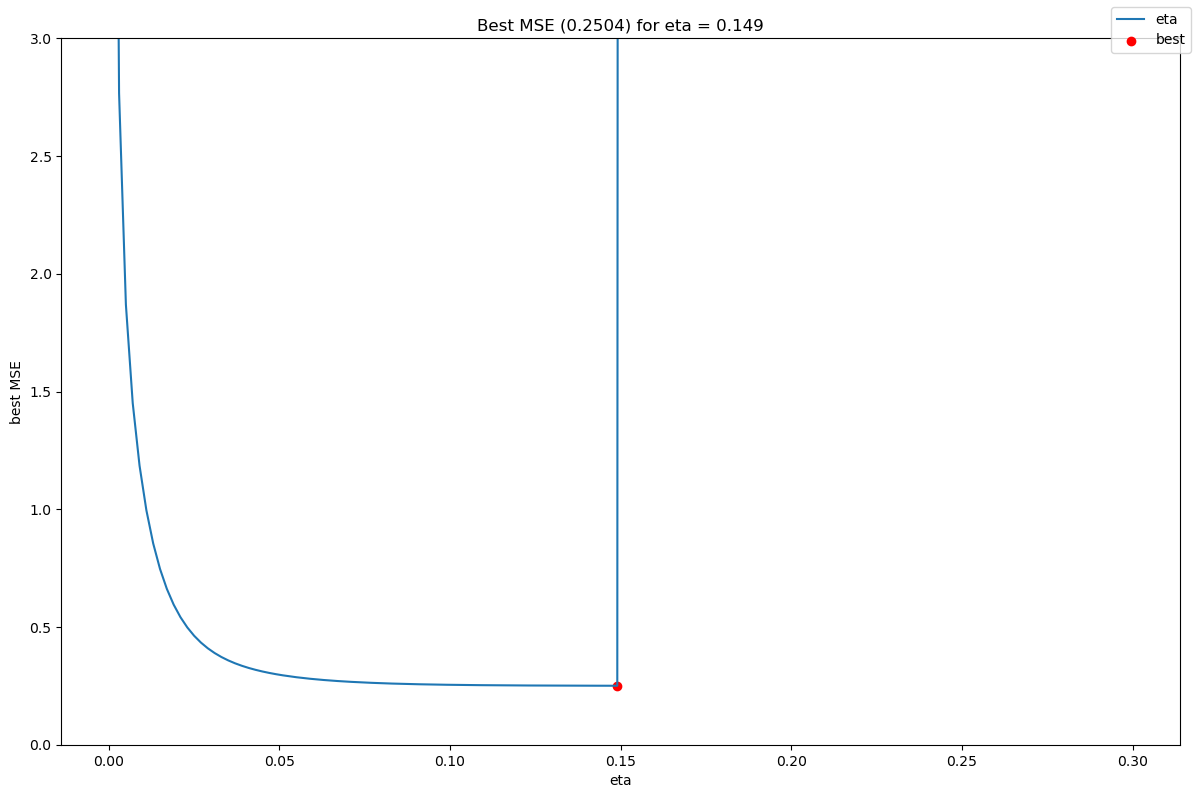

In [918]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

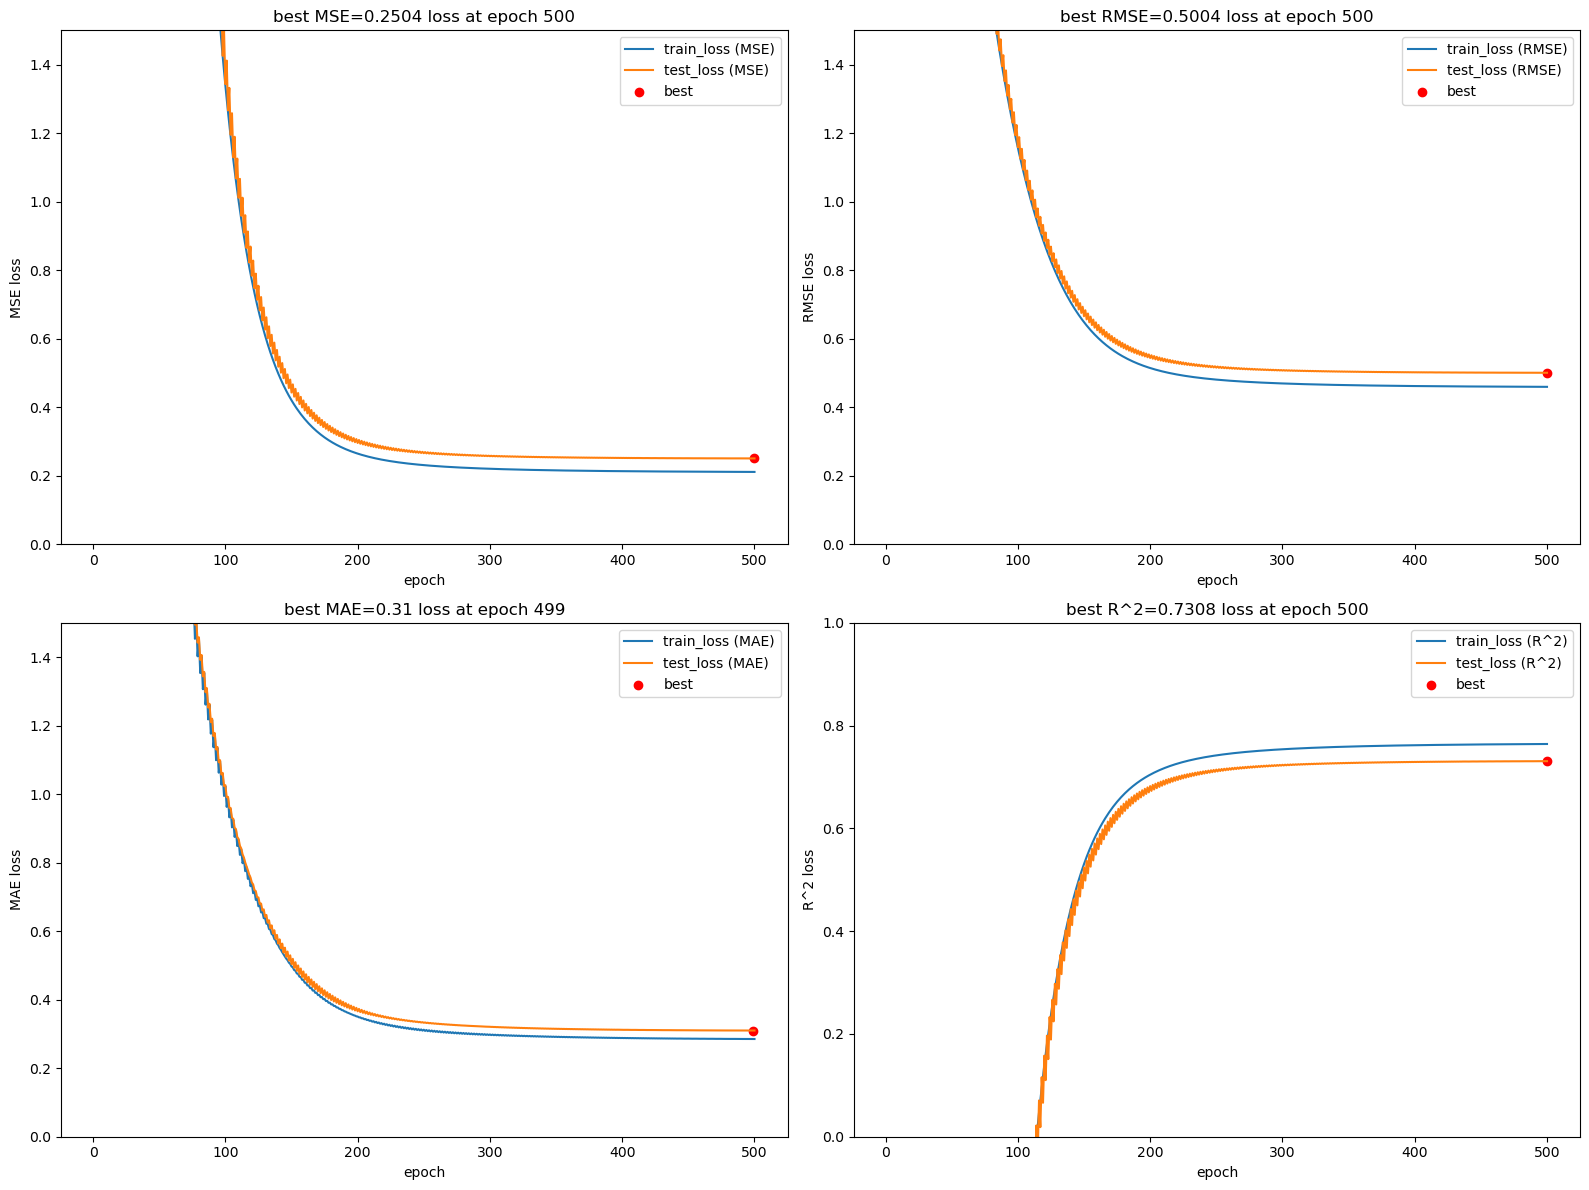

In [919]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

Let's do same for Mini-Batches!

In [920]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 300, 2):
    eta = 0.001 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, data=X_train_reduced, test=X_test_reduced, y_train=y_train, y_test=y_test, n_epochs=500, batch_size=32)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.001
eta: 0.003
eta: 0.005
eta: 0.007
eta: 0.009000000000000001
eta: 0.011
eta: 0.013000000000000001
eta: 0.015
eta: 0.017
eta: 0.019
eta: 0.021
eta: 0.023
eta: 0.025
eta: 0.027
eta: 0.029
eta: 0.031
eta: 0.033
eta: 0.035
eta: 0.037
eta: 0.039
eta: 0.041
eta: 0.043000000000000003
eta: 0.045
eta: 0.047
eta: 0.049
eta: 0.051000000000000004
eta: 0.053
eta: 0.055
eta: 0.057
eta: 0.059000000000000004
eta: 0.061
eta: 0.063
eta: 0.065
eta: 0.067
eta: 0.069
eta: 0.07100000000000001
eta: 0.073
eta: 0.075
eta: 0.077
eta: 0.079
eta: 0.081
eta: 0.083
eta: 0.085
eta: 0.08700000000000001
eta: 0.089
eta: 0.091
eta: 0.093
eta: 0.095
eta: 0.097
eta: 0.099
eta: 0.101
eta: 0.10300000000000001
eta: 0.105
eta: 0.107
eta: 0.109
eta: 0.111
eta: 0.113
eta: 0.115
eta: 0.117
eta: 0.11900000000000001
eta: 0.121
eta: 0.123
eta: 0.125
eta: 0.127
eta: 0.129
eta: 0.131
eta: 0.133
eta: 0.135
eta: 0.137
eta: 0.139
eta: 0.14100000000000001
eta: 0.14300000000000002
eta: 0.145
eta: 0.147
eta: 0.149
eta: 0.151
eta: 

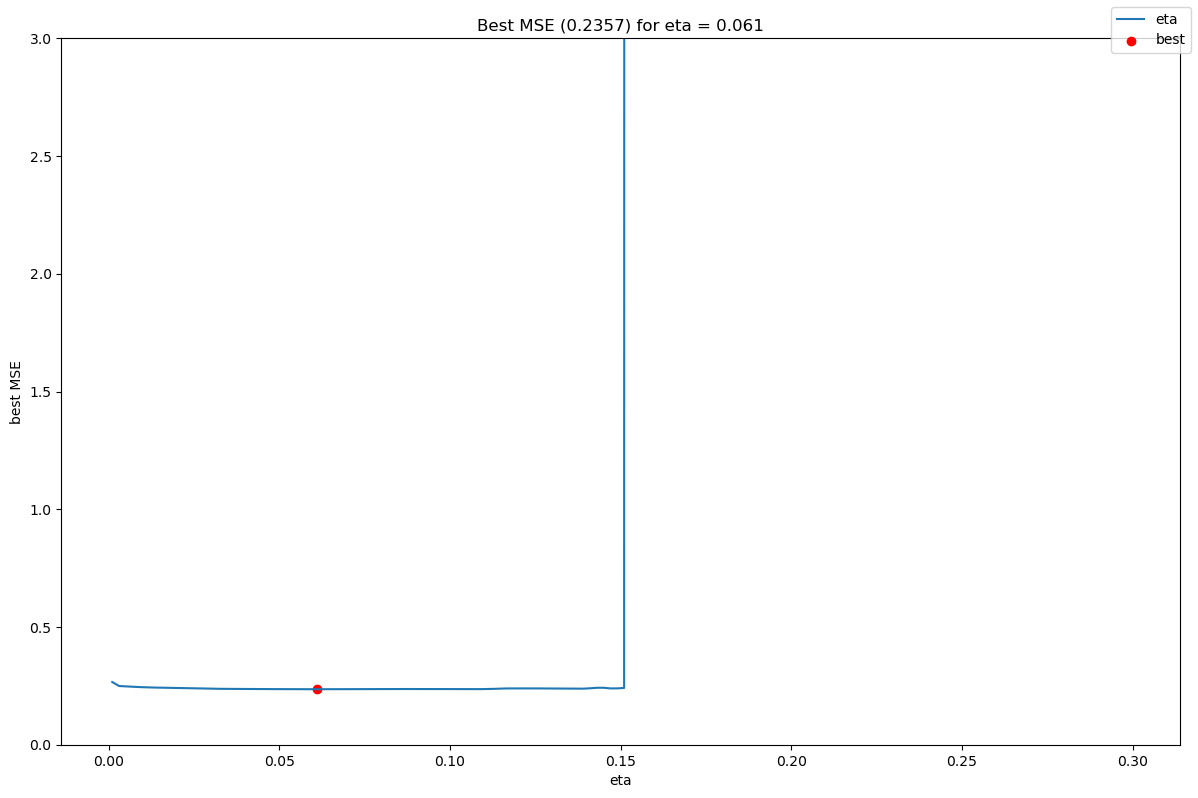

In [921]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

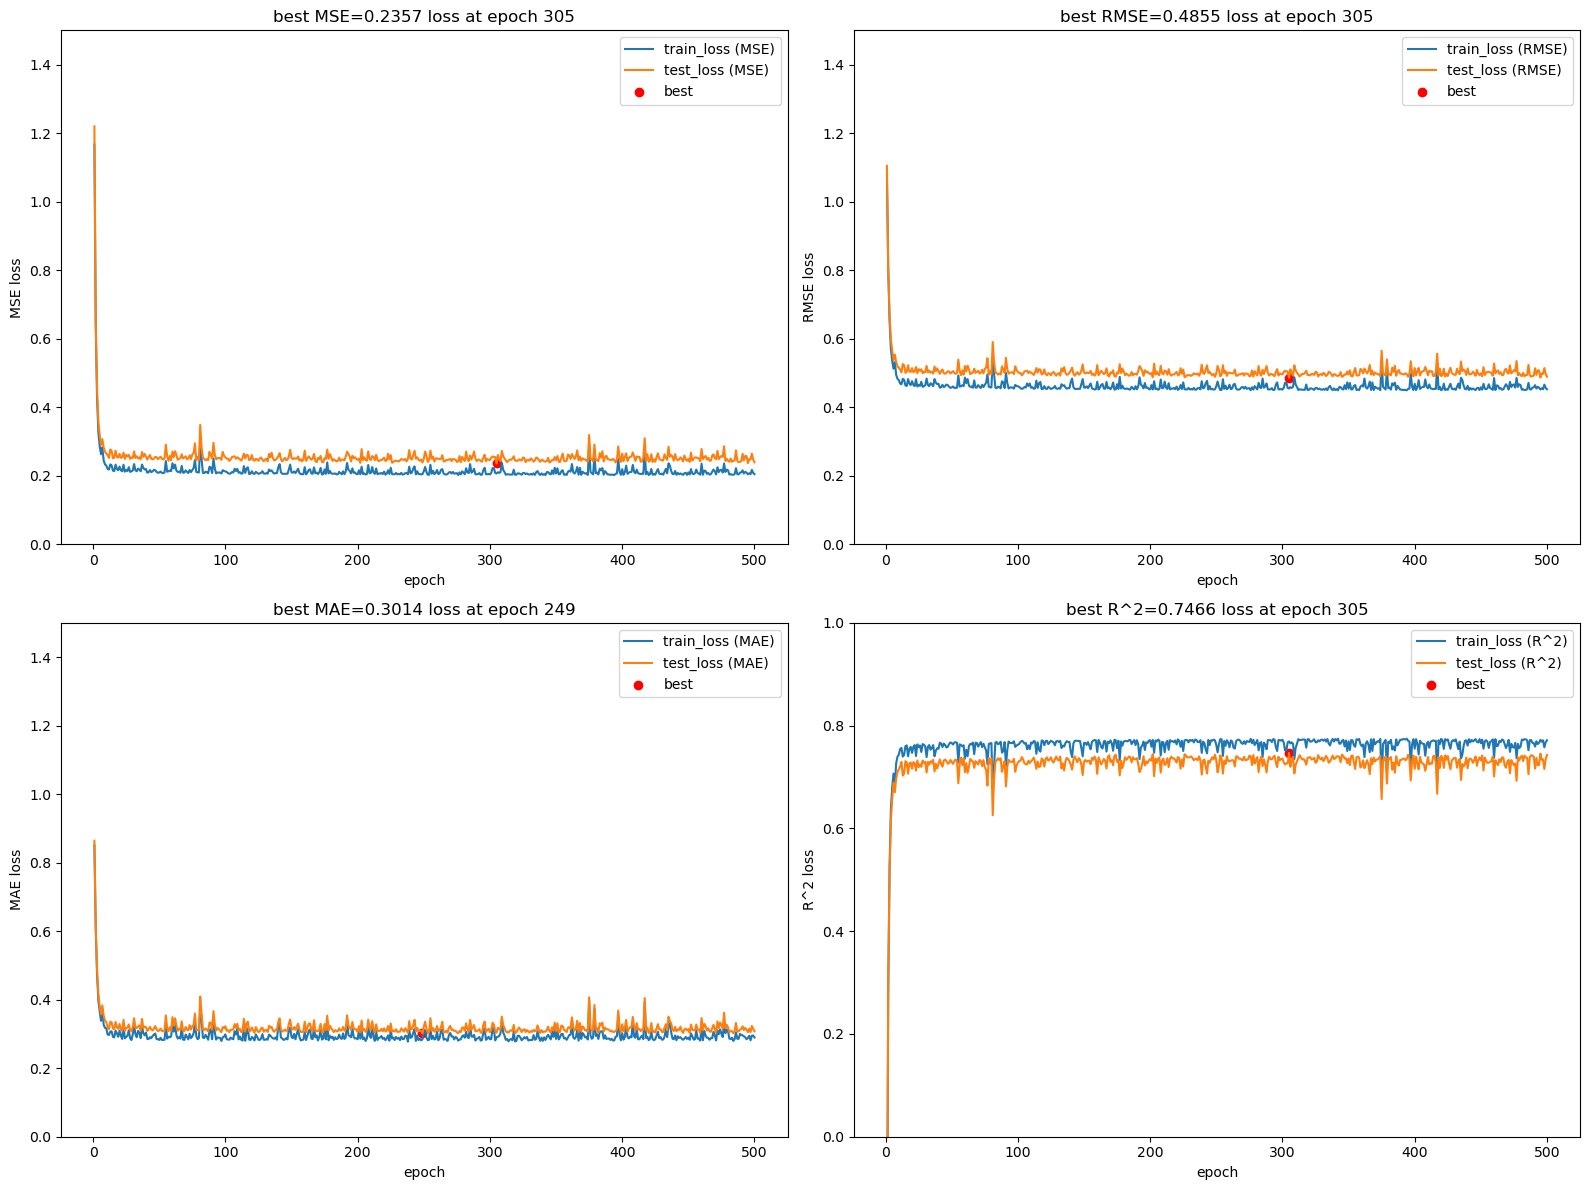

In [922]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

Now let's try with polynomial features

In [923]:
poly = sk.preprocessing.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [924]:
X_train_reduced

,bmi,children,physical_activity,stress_level,sleep_quality,income (USD),smoking,not_smoking,is_male,region_northwest,...,work_sector_Healthcare,work_sector_Hospitality,work_sector_IT,work_sector_Management,work_sector_Retail,age_15-25,age_25-35,age_35-45,age_45-55,age_55-65
0,0.061304,0.0,2.0,-0.308450,2.0,-0.988320,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.541822,3.0,1.0,-1.781716,2.0,1.258099,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.896876,3.0,1.0,0.752302,0.0,1.267427,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.675390,0.0,0.0,-0.544172,0.0,-1.800605,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.148626,3.0,0.0,0.398718,0.0,1.063873,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,-0.402533,1.0,0.0,-0.072727,0.0,0.057168,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2294,2.158116,1.0,2.0,0.516579,0.0,0.225669,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2295,0.564971,0.0,2.0,-1.015618,0.0,-1.830977,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2296,0.055962,2.0,3.0,0.634440,0.0,0.528608,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [925]:
#numeric_cols = X_train_reduced.columns
numeric_cols = ['bmi', 'children', 'physical_activity', 'stress_level', 'negative_income_flag', 'income (USD)']
numeric_cols

['bmi',
 'children',
 'physical_activity',
 'stress_level',
 'negative_income_flag',
 'income (USD)']

In [926]:
Xtr_num = X_train_reduced[numeric_cols]
Xt_num = X_test_reduced[numeric_cols]

Xtr_poly = poly.fit_transform(Xtr_num)
Xte_poly  = poly.transform(Xt_num)

sc = sk.preprocessing.StandardScaler()
Xtr_poly = sc.fit_transform(Xtr_poly)
Xt_poly = sc.transform(Xte_poly)

In [927]:
X_train_augmented = X_train_reduced.drop(columns=numeric_cols)
X_test_augmented = X_test_reduced.drop(columns=numeric_cols)

X_train_augmented = pd.concat([X_train_augmented, pd.DataFrame(Xtr_poly, columns=poly.get_feature_names_out())],axis=1)
X_test_augmented = pd.concat([X_test_augmented, pd.DataFrame(Xte_poly, columns=poly.get_feature_names_out())], axis=1)

Now let's do the same with augs

In [928]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for i in range(1, 33, 1):
    eta = 0.01 * i
    print(f'eta: {eta}')
    logs = linear_regression(eta, data=X_train_augmented, test=X_test_augmented, y_train=y_train, y_test=y_test, n_epochs=3000)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

eta: 0.01
eta: 0.02
eta: 0.03
eta: 0.04
eta: 0.05
eta: 0.06
eta: 0.07
eta: 0.08
eta: 0.09
eta: 0.1
eta: 0.11
eta: 0.12
eta: 0.13
eta: 0.14
eta: 0.15
eta: 0.16
eta: 0.17
eta: 0.18
eta: 0.19
eta: 0.2
eta: 0.21
eta: 0.22
eta: 0.23
eta: 0.24
eta: 0.25
eta: 0.26
eta: 0.27
eta: 0.28
eta: 0.29
eta: 0.3
eta: 0.31
eta: 0.32


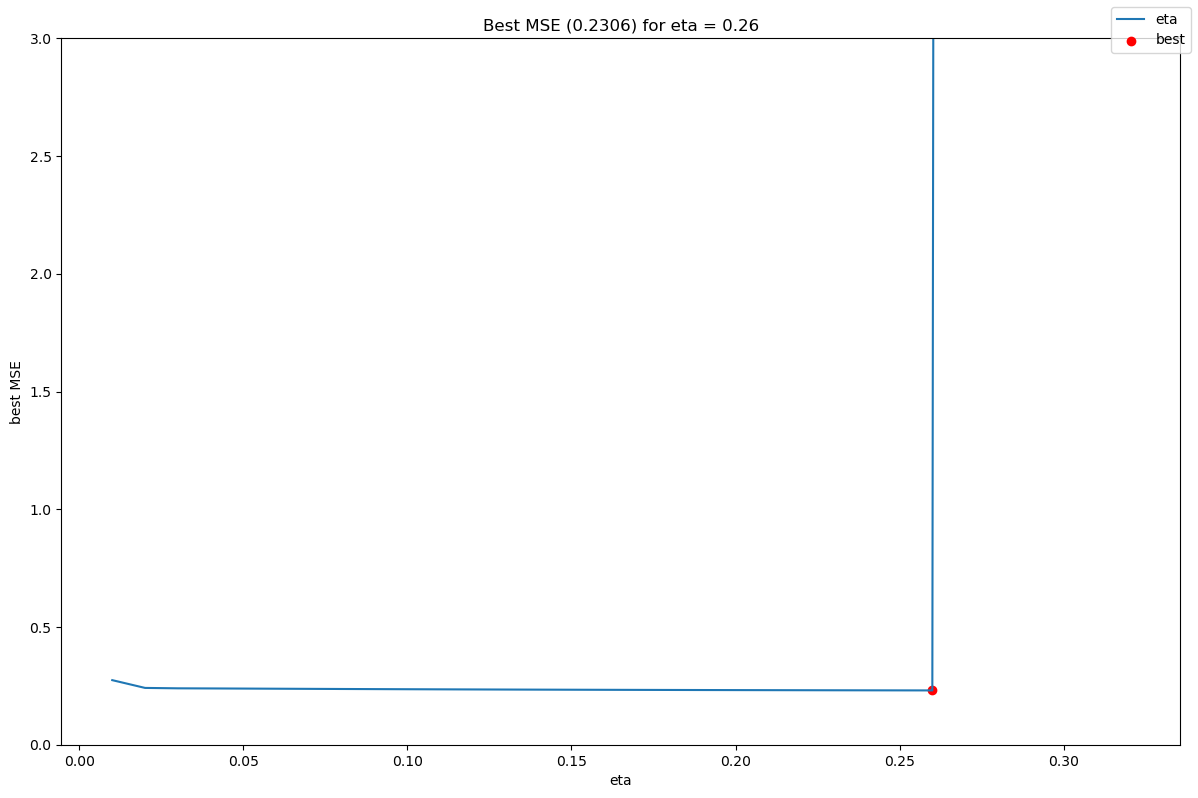

In [929]:
eta_x = [i for (i, _, _) in eta_logs]
eta_y = [i for (_, _, i) in eta_logs]
best_idx = np.argmin(eta_y)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(eta_x, eta_y, label='eta')
ax.scatter(eta_x[best_idx], eta_y[best_idx], marker='o', label='best', color='r')
ax.set_xlabel('eta')
ax.set_ylabel('best MSE')
ax.set_title(f'Best MSE ({eta_y[best_idx]:.4}) for eta = {eta_x[best_idx]}')
ax.set_ylim([0, 3])
fig.legend()
fig.tight_layout()
plt.show()

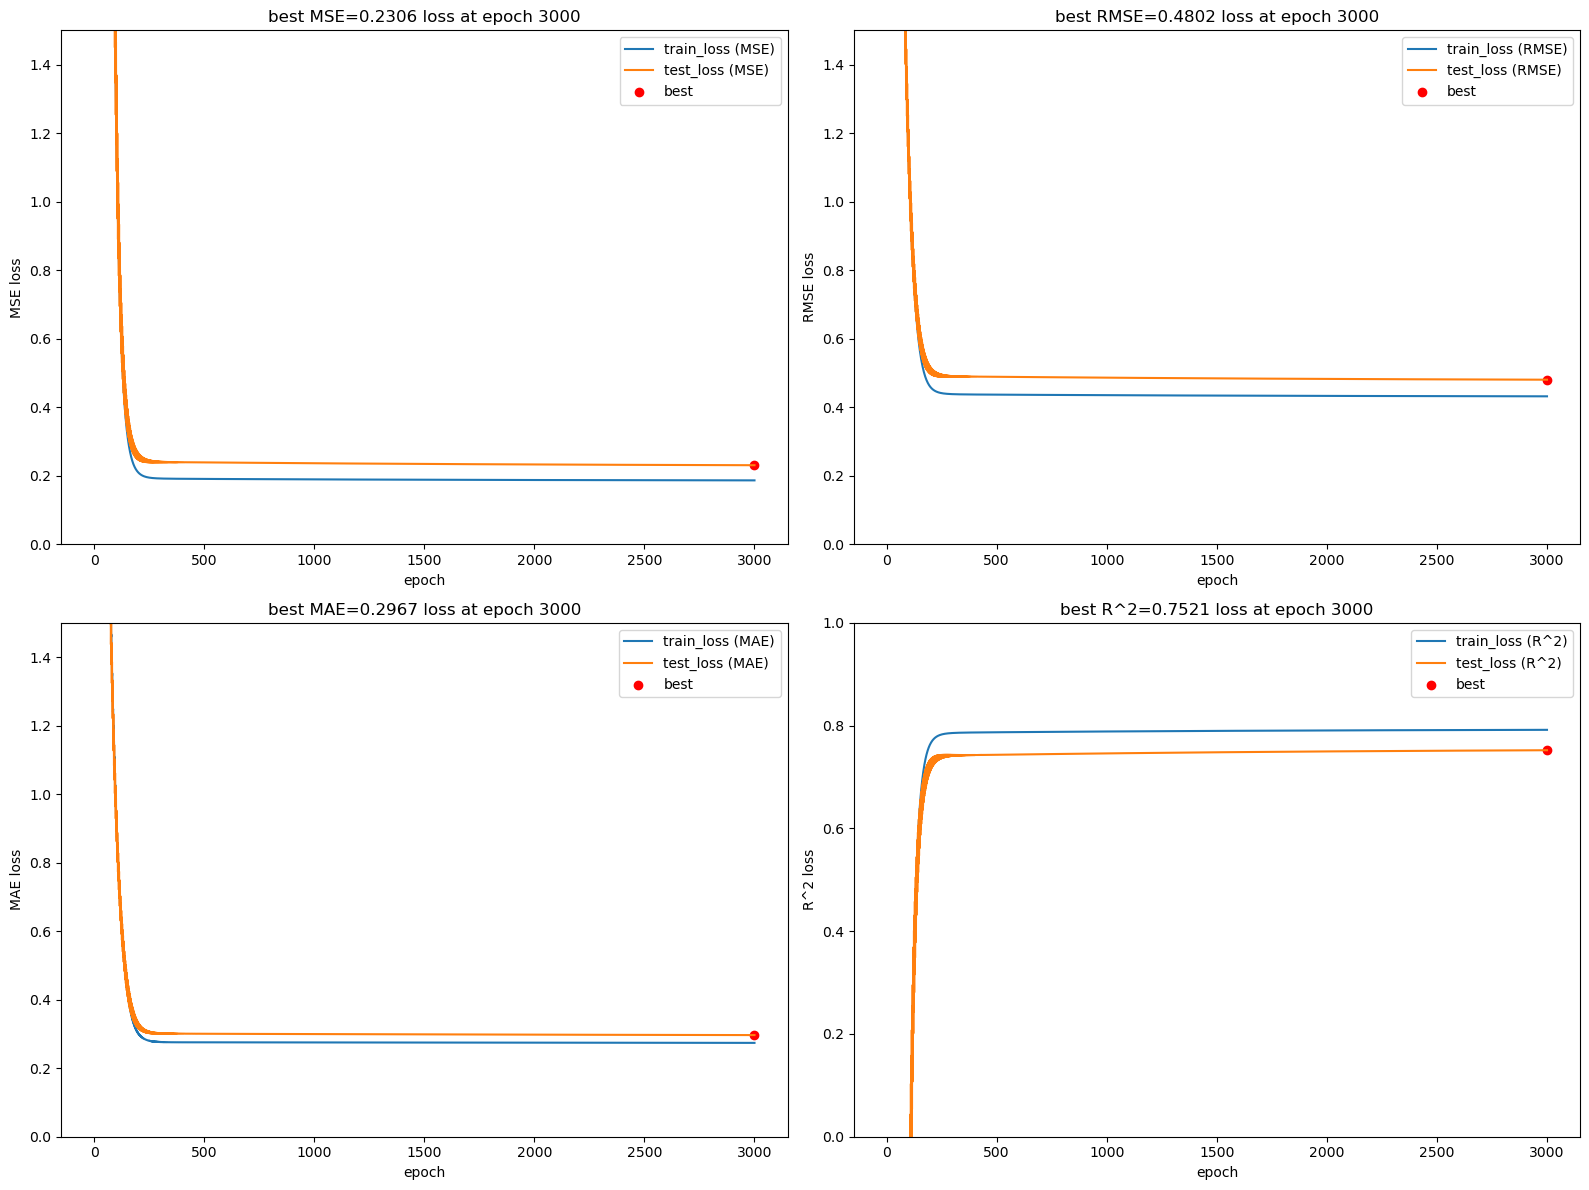

In [930]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

As we can see it takes much more time for a model to converge + we need smaller ETA (otherwise it's diverging)

Lasso (best_eta = 0.26)

In [937]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
best_alpha = None
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

for a in alphas:
    eta = 0.26
    print(f'alpha: {a}')
    logs = linear_regression(eta, data=X_train_augmented, test=X_test_augmented, y_train=y_train, y_test=y_test, n_epochs=3000, lasso=True,
                             alpha=a)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs
        best_alpha = a

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

alpha: 1e-05
alpha: 5e-05
alpha: 0.0001
alpha: 0.0005
alpha: 0.001
alpha: 0.005
alpha: 0.01
alpha: 0.05
alpha: 0.1
alpha: 0.5
alpha: 1


In [938]:
print(f'best alpha: {best_alpha}')
l = find_best_epoch(best_epoch_logs)
l.theta

best alpha: 0.001


[8.889952745773646,
 -0.009424464173721054,
 0.38072757036506394,
 0.0,
 -0.04238138804160775,
 0.009204721010450298,
 -0.03305553527728968,
 0.2377300688309495,
 -0.04342374695567988,
 0.26605849040820645,
 -0.11531541208349387,
 0.3584116250174399,
 0.3190541872341673,
 -0.08278585339089037,
 0.4605445817695757,
 0.28498498525330396,
 -0.08289237397020525,
 -0.2042567614122422,
 -0.06444550096864182,
 0.12440700339311905,
 0.2896386603138191,
 0.3523060256618445,
 0.02469364538211496,
 0.02679972496921761,
 -0.019392018863275202,
 0.013105776394715787,
 0.023859767015025013,
 0.5379886405402212,
 0.0013125318548079404,
 -0.01732885189003198,
 -0.005491757600931763,
 0.02574219929931857,
 0.006925448058102406,
 0.0123162078153733,
 0.008295739831493691,
 -0.02850750753455404,
 -0.11595807316792844,
 -0.0,
 -0.05031883069307185,
 -0.006731556124109441,
 0.021372662506555357,
 0.008196119304097773,
 -0.08968087395935449]

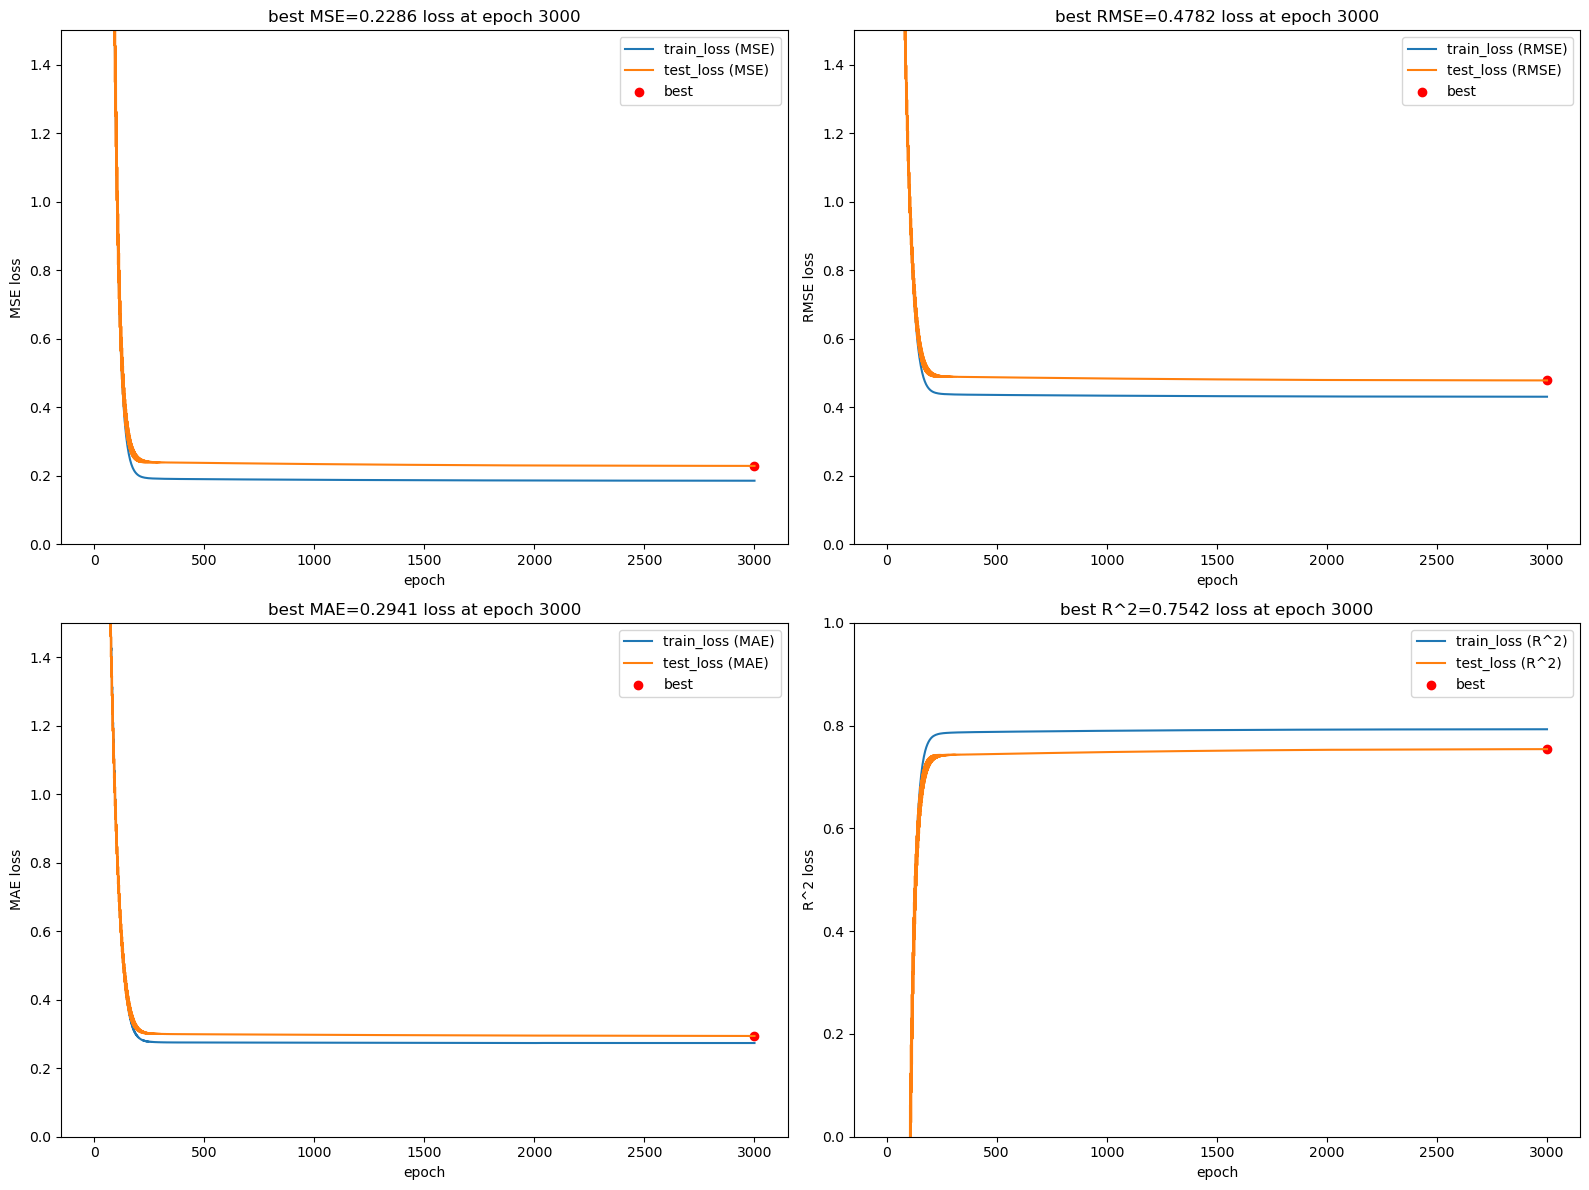

In [939]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()

In [940]:
eta_logs = []
best_epoch_logs = None
best_eta_loss = float('inf')
for a in alphas:
    eta = 0.26
    print(f'alpha: {a}')
    logs = linear_regression(eta, data=X_train_augmented, test=X_test_augmented, y_train=y_train, y_test=y_test, n_epochs=3000, ridge=True,
                             alpha=a)
    ans = find_best_epoch(logs)
    if ans.test_losses[0] < best_eta_loss:
        best_eta_loss = ans.test_losses[0]
        best_epoch_logs = logs
        best_alpha = a

    eta_logs.append((eta, ans.train_losses[0], ans.test_losses[0]))

alpha: 1e-05
alpha: 5e-05
alpha: 0.0001
alpha: 0.0005
alpha: 0.001
alpha: 0.005
alpha: 0.01
alpha: 0.05
alpha: 0.1
alpha: 0.5
alpha: 1


In [941]:
print(f'best alpha: {best_alpha}')
l = find_best_epoch(best_epoch_logs)
l.theta

best alpha: 0.001


[8.913171403385245,
 -0.009919957232458077,
 0.38576986491394605,
 0.004952686225741257,
 -0.04477054793659873,
 0.011328307754923127,
 -0.03495525248002211,
 0.23729097267824784,
 -0.04416237515536872,
 0.2735493621625201,
 -0.1235476584302415,
 0.36314935802678194,
 0.3227979498014551,
 -0.08791329538243205,
 0.46179234818389076,
 0.29059569611109337,
 -0.08749735614371486,
 -0.23221046825008998,
 -0.092178228370283,
 0.1021031821172488,
 0.2672605547320631,
 0.33081756037473387,
 0.02714191473103763,
 0.025857461572405125,
 -0.020782800140945263,
 0.014377617175157639,
 0.028005071268770634,
 0.5356975761649875,
 0.0019171456017474404,
 -0.01968111983266847,
 -0.006331638064542082,
 0.026496445487006005,
 0.007580553709561522,
 0.014400561629320244,
 0.008262859049396727,
 -0.0310713956466573,
 -0.1169066003221076,
 -0.0015950099402360736,
 -0.052974940644401294,
 -0.00750020610774564,
 0.02200714982220689,
 0.008148151362248241,
 -0.0894716539193302]

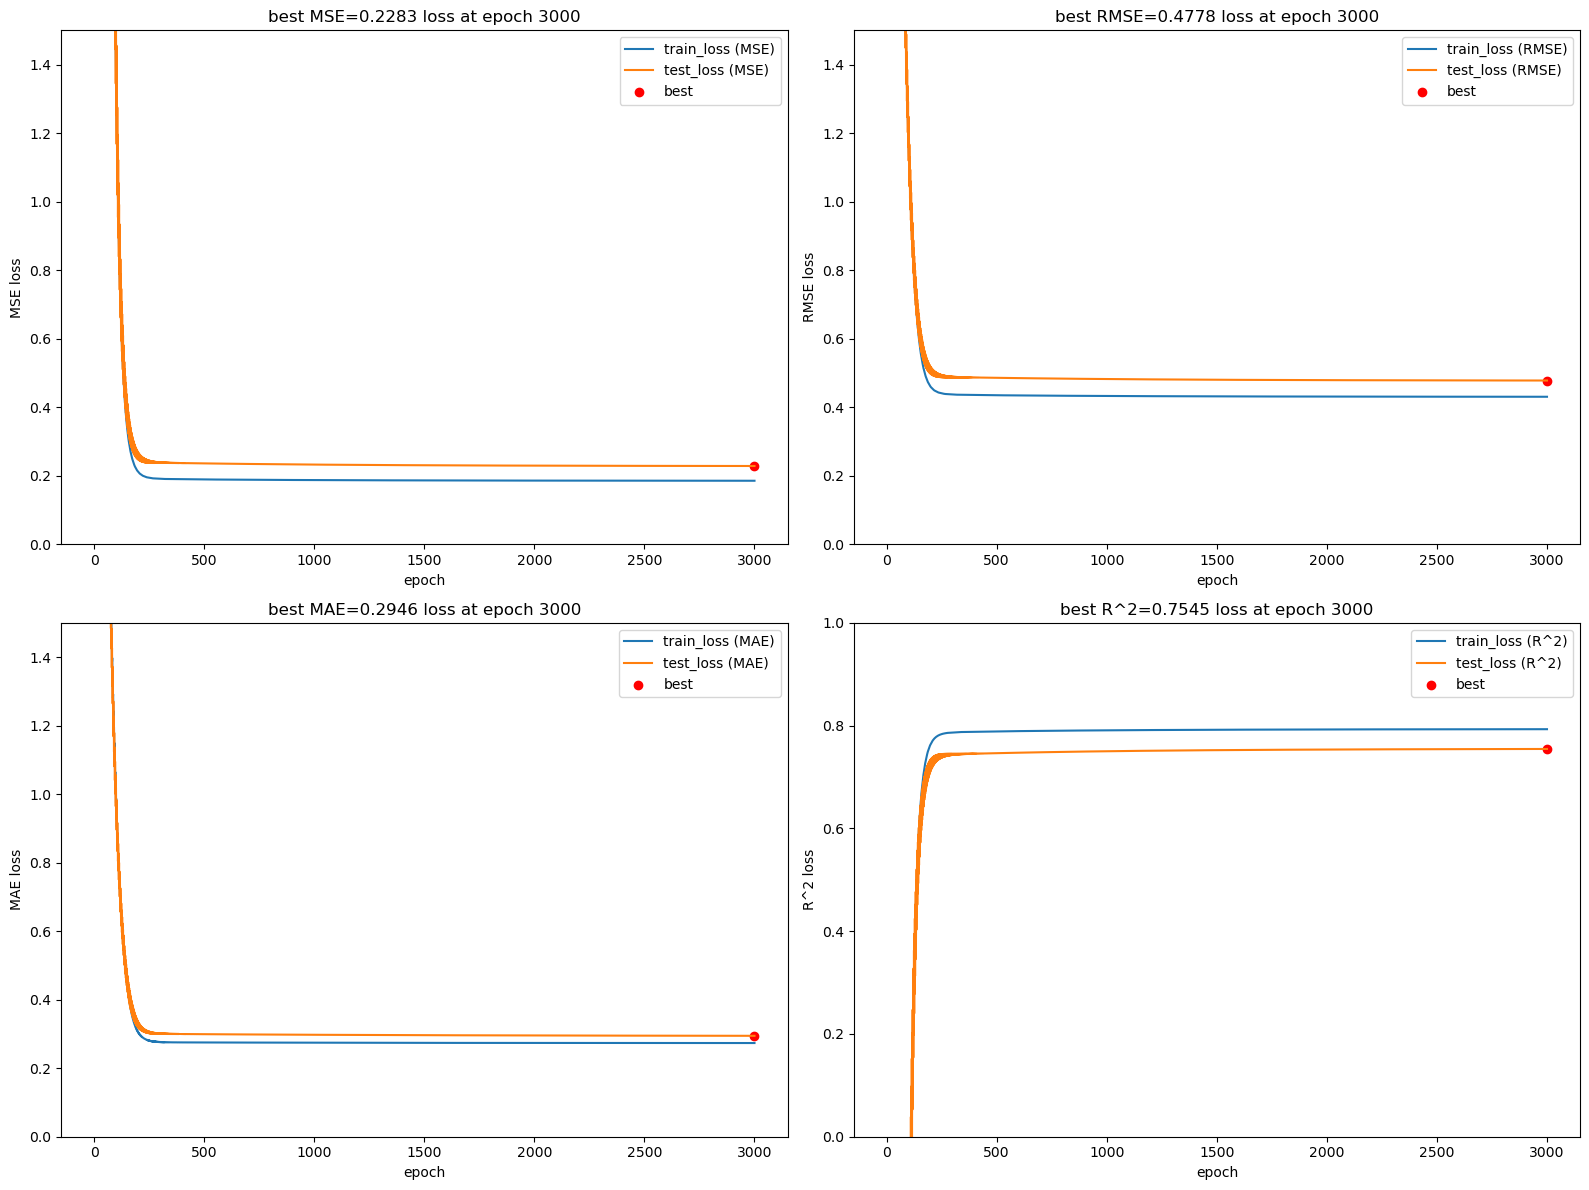

In [942]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
labels = ['MSE', 'RMSE', 'MAE', 'R^2']
lims = [
    [0, 1.5],
    [0, 1.5],
    [0, 1.5],
    [0, 1]
]

for i in range(2):
    for j in range(2):
        epoch_x = [i.epoch for i in best_epoch_logs]
        l = labels[i*2+j]
        epoch_y_tr = [k.train_losses[i*2+j] for k in best_epoch_logs]
        epoch_y_t = [k.test_losses[i*2+j] for k in best_epoch_logs]
        best_idx = np.argmin(epoch_y_t) if i*2+j != 3 else np.argmax(epoch_y_t)

        axes[i][j].plot(epoch_x, epoch_y_tr, label=f'train_loss ({l})')
        axes[i][j].plot(epoch_x, epoch_y_t, label=f'test_loss ({l})')
        axes[i][j].scatter(epoch_x[best_idx], epoch_y_t[best_idx], marker='o', label='best', color='r')
        axes[i][j].set_title(f'best {l}={epoch_y_t[best_idx]:.4} loss at epoch {epoch_x[best_idx]}')
        axes[i][j].set_xlabel('epoch')
        axes[i][j].set_ylabel(f'{l} loss')
        axes[i][j].set_ylim(lims[i*2+j])
        axes[i][j].legend()

fig.tight_layout()
plt.show()